## import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rc
rc('font', family='Malgun Gothic') # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호출력 설정

# 불러오기

In [3]:
df = pd.read_pickle('./WHtR_concat/01/reduction_03.pkl')

In [4]:
df.head()

,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,165,60,72.1,1.2,1.5,127.0,79.0,90.0,1.1,21.0,27.0,21.0,1.0,0.0
1,185,85,94.0,1.2,1.2,114.0,72.0,86.0,1.1,25.0,32.0,26.0,3.0,1.0
2,165,55,77.5,1.5,1.5,130.0,70.0,87.0,0.9,18.0,10.0,15.0,1.0,0.0
3,165,75,84.0,1.0,1.0,139.0,80.0,92.0,0.9,27.0,30.0,25.0,2.0,1.0
4,175,70,83.0,0.9,1.2,110.0,70.0,120.0,0.8,19.0,14.0,25.0,3.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57903 entries, 0 to 57902
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   신장(5Cm단위)   57903 non-null  int64  
 1   체중(5Kg 단위)  57903 non-null  int64  
 2   허리둘레        57903 non-null  float64
 3   시력(좌)       57903 non-null  float64
 4   시력(우)       57903 non-null  float64
 5   수축기 혈압      57903 non-null  float64
 6   이완기 혈압      57903 non-null  float64
 7   식전혈당(공복혈당)  57903 non-null  float64
 8   혈청크레아티닌     57903 non-null  float64
 9   (혈청지오티)AST  57903 non-null  float64
 10  (혈청지오티)ALT  57903 non-null  float64
 11  감마 지티피      57903 non-null  float64
 12  흡연상태        57903 non-null  float64
 13  음주여부        57903 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 6.2 MB


In [6]:
df1 = df.copy()

In [7]:
df1 = df1.astype(float)
df1.head(3)

,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,165.0,60.0,72.1,1.2,1.5,127.0,79.0,90.0,1.1,21.0,27.0,21.0,1.0,0.0
1,185.0,85.0,94.0,1.2,1.2,114.0,72.0,86.0,1.1,25.0,32.0,26.0,3.0,1.0
2,165.0,55.0,77.5,1.5,1.5,130.0,70.0,87.0,0.9,18.0,10.0,15.0,1.0,0.0


# 각 값의 분포

In [8]:
len(df1.columns), df1.columns

(14,
 Index(['신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '수축기 혈압', '이완기 혈압',
        '식전혈당(공복혈당)', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
        '음주여부'],
       dtype='object'))

## 병무청 값 정보
- 신장 : 170 175 180
- 체중 : 60 _ 78
- 시력(좌) : 0.1 _ 1.0
- 시력(우) : saa.
- 수축기 혈압 : 100 _ _ _ 233
- 이완기 혈압 : 69 _ 81 
- 공복혈당 : 93 _ 104
- 크레아티닌 : 82 _ 98
- AST : 15 _ 23
- ALT : 12 _ 27
- 감마 지티피 : 15 _ 29

In [9]:
li = [df1.columns[i : i+3] for i in range(0, 15, 3)]
li

[Index(['신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레'], dtype='object'),
 Index(['시력(좌)', '시력(우)', '수축기 혈압'], dtype='object'),
 Index(['이완기 혈압', '식전혈당(공복혈당)', '혈청크레아티닌'], dtype='object'),
 Index(['(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피'], dtype='object'),
 Index(['흡연상태', '음주여부'], dtype='object')]

## 신장, 체중

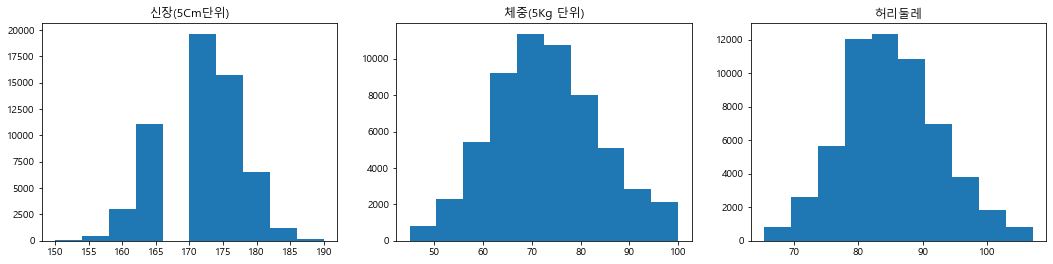

In [10]:
fig = plt.figure(figsize=(6*3, 4))

for i, col in enumerate(li[0]):
    ax = fig.add_subplot(1, 3, i+1)
    ax.hist(df1[col])
    ax.set_title(col)

- 신장 : 170 175 180
- 체중 : 60 _ 78

- 병무청 기준 체중이 조금 더 나감

## 좌우시력, 수축기 혈압

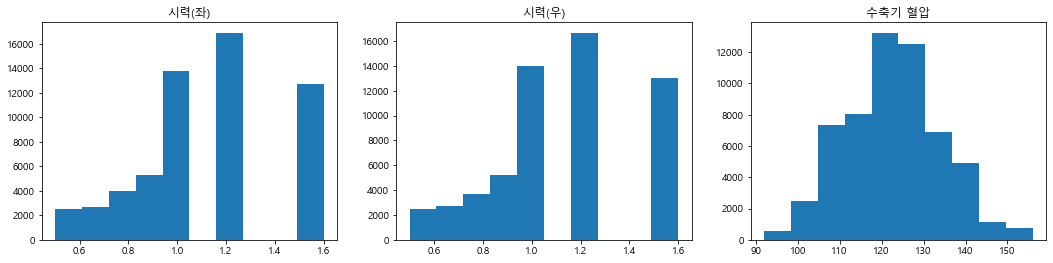

In [11]:
fig = plt.figure(figsize=(6*3, 4))

for i, col in enumerate(li[1]):
    ax = fig.add_subplot(1, 3, i+1)
    ax.hist(df1[col])
    ax.set_title(col)

- 시력(좌) : 0.1 _ 1.0
- 시력(우) : saa.
- 수축기 혈압 : 100 _ _ _ 233

- 병무청 기준 시력이 훨씬 좋다. 분포차이 큼, 0.0이 없음
- 수축기 혈압은 min max만 알아서 잘 모르겠음

In [12]:
df1['시력(좌)'].unique()

array([1.2, 1.5, 1. , 0.9, 0.7, 0.5, 0.8, 0.6, 1.3, 1.1, 1.6])

## 이완기혈압, 공복혈당, 혈청크레아티닌

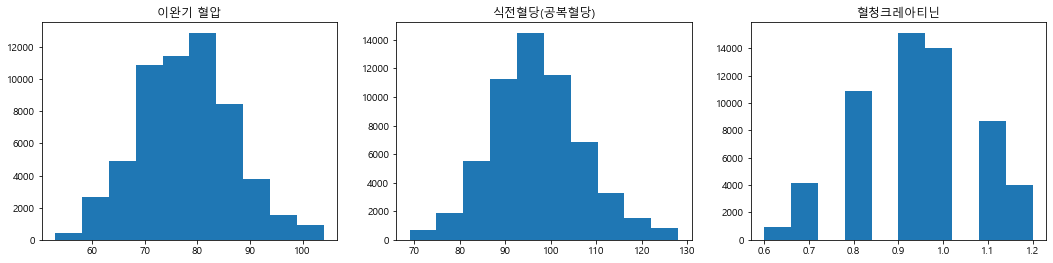

In [13]:
fig = plt.figure(figsize=(6*3, 4))

for i, col in enumerate(li[2]):
    ax = fig.add_subplot(1, 3, i+1)
    ax.hist(df1[col])
    ax.set_title(col)

- 이완기 혈압 : 69 _ 81 
- 공복혈당 : 93 _ 104
- 크레아티닌 : 82 _ 98

- 이완기 혈압 약간 높음.
- 공복혈당 분포 꽤 비슷
- 크레아티닌 단위가 다른듯.

In [14]:
df['혈청크레아티닌'].describe()

count    57903.000000
mean         0.937333
std          0.139578
min          0.600000
25%          0.800000
50%          0.900000
75%          1.000000
max          1.200000
Name: 혈청크레아티닌, dtype: float64

## AST, ALT, 감마지티피

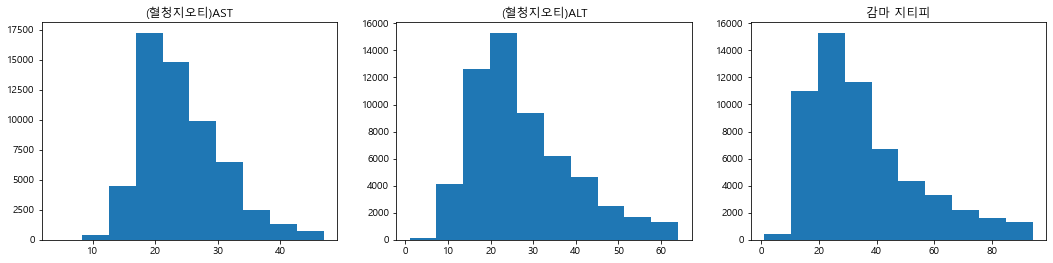

In [15]:
fig = plt.figure(figsize=(6*3, 4))

for i, col in enumerate(li[3]):
    ax = fig.add_subplot(1, 3, i+1)
    ax.hist(df1[col])
    ax.set_title(col)

- AST : 15 _ 23
- ALT : 12 _ 27
- 감마 지티피 : 15 _ 29

- AST : 높음
- ALT : 높음
- 감마 지티피 : 높음

# 분포 상이 컬럼 제외

- 시력, 크레아티닌

In [16]:
df2 = df1.copy()

In [17]:
df2.columns

Index(['신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '수축기 혈압', '이완기 혈압',
       '식전혈당(공복혈당)', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부'],
      dtype='object')

In [18]:
df2.drop(columns=['혈청크레아티닌',  '시력(좌)', '시력(우)'], inplace=True)

# bmi, WHtR 추가
- Waist to Height Ratio

## bmi 추가

In [27]:
df3 = df2.copy()

In [28]:
df3.columns

Index(['신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부'],
      dtype='object')

In [37]:
df3['bmi'] = (df3['체중(5Kg 단위)'] / (df3['신장(5Cm단위)']/100.0)**2).round(1)

In [38]:
df3.head()

,신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,bmi
0,165.0,60.0,72.1,127.0,79.0,90.0,21.0,27.0,21.0,1.0,0.0,22.0
1,185.0,85.0,94.0,114.0,72.0,86.0,25.0,32.0,26.0,3.0,1.0,24.8
2,165.0,55.0,77.5,130.0,70.0,87.0,18.0,10.0,15.0,1.0,0.0,20.2
3,165.0,75.0,84.0,139.0,80.0,92.0,27.0,30.0,25.0,2.0,1.0,27.5
4,175.0,70.0,83.0,110.0,70.0,120.0,19.0,14.0,25.0,3.0,1.0,22.9


<AxesSubplot:>

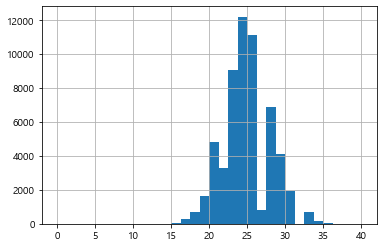

In [43]:
df3['bmi'].hist(range=(0, 40), bins=32)

## [보류] 이상치 제거 

<AxesSubplot:>

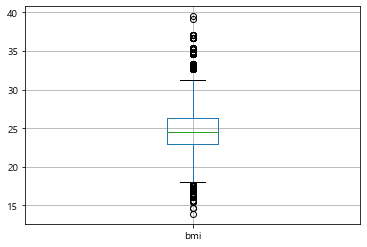

In [46]:
df3.loc[:, ['bmi']].boxplot()

## WHtR 추가

In [47]:
df4 = df3.copy()

In [48]:
df4.head()

,신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,bmi
0,165.0,60.0,72.1,127.0,79.0,90.0,21.0,27.0,21.0,1.0,0.0,22.0
1,185.0,85.0,94.0,114.0,72.0,86.0,25.0,32.0,26.0,3.0,1.0,24.8
2,165.0,55.0,77.5,130.0,70.0,87.0,18.0,10.0,15.0,1.0,0.0,20.2
3,165.0,75.0,84.0,139.0,80.0,92.0,27.0,30.0,25.0,2.0,1.0,27.5
4,175.0,70.0,83.0,110.0,70.0,120.0,19.0,14.0,25.0,3.0,1.0,22.9


In [52]:
df4['WHtR'] = (df4['허리둘레'] / df4['신장(5Cm단위)']).round(3)

In [53]:
df4.head(2)

,신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,bmi,WHtR
0,165.0,60.0,72.1,127.0,79.0,90.0,21.0,27.0,21.0,1.0,0.0,22.0,0.437
1,185.0,85.0,94.0,114.0,72.0,86.0,25.0,32.0,26.0,3.0,1.0,24.8,0.508


<AxesSubplot:>

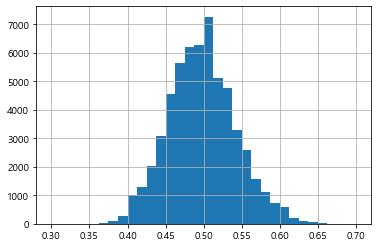

In [57]:
df4['WHtR'].hist(range=(0.3, 0.7), bins=32)

## [보류] 이상치 제거

<AxesSubplot:>

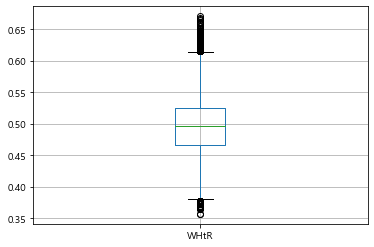

In [58]:
df4.loc[:, ['WHtR']].boxplot()

In [171]:
df4.head(3)

,신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,bmi,WHtR
0,165.0,60.0,72.1,127.0,79.0,90.0,21.0,27.0,21.0,1.0,0.0,22.0,0.437
1,185.0,85.0,94.0,114.0,72.0,86.0,25.0,32.0,26.0,3.0,1.0,24.8,0.508
2,165.0,55.0,77.5,130.0,70.0,87.0,18.0,10.0,15.0,1.0,0.0,20.2,0.470


# 중간저장

# 상관계수 확인

In [145]:
crr = df4.astype(float).corr()
crr = crr.round(2)
crr

,신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,bmi,WHtR
신장(5Cm단위),1.00,0.45,0.20,0.03,0.00,0.02,-0.04,-0.02,-0.03,0.02,0.05,-0.04,-0.19
체중(5Kg 단위),0.45,1.00,0.81,0.25,0.21,0.15,0.13,0.30,0.20,0.01,0.04,0.87,0.64
허리둘레,0.20,0.81,1.00,0.22,0.21,0.15,0.15,0.35,0.26,0.02,0.04,0.80,0.92
수축기 혈압,0.03,0.25,0.22,1.00,0.73,0.13,0.10,0.13,0.17,0.01,0.04,0.26,0.21
이완기 혈압,0.00,0.21,0.21,0.73,1.00,0.12,0.11,0.14,0.19,0.02,0.05,0.23,0.21
식전혈당(공복혈당),0.02,0.15,0.15,0.13,0.12,1.00,0.02,0.12,0.17,0.03,0.05,0.16,0.14
(혈청지오티)AST,-0.04,0.13,0.15,0.10,0.11,0.02,1.00,0.67,0.33,-0.01,0.03,0.17,0.16
(혈청지오티)ALT,-0.02,0.30,0.35,0.13,0.14,0.12,0.67,1.00,0.42,0.00,-0.02,0.35,0.35
감마 지티피,-0.03,0.20,0.26,0.17,0.19,0.17,0.33,0.42,1.00,0.17,0.14,0.24,0.27
흡연상태,0.02,0.01,0.02,0.01,0.02,0.03,-0.01,0.00,0.17,1.00,0.13,0.01,0.01


In [146]:
crr1 = crr.applymap(lambda x: np.abs(x).round(2))

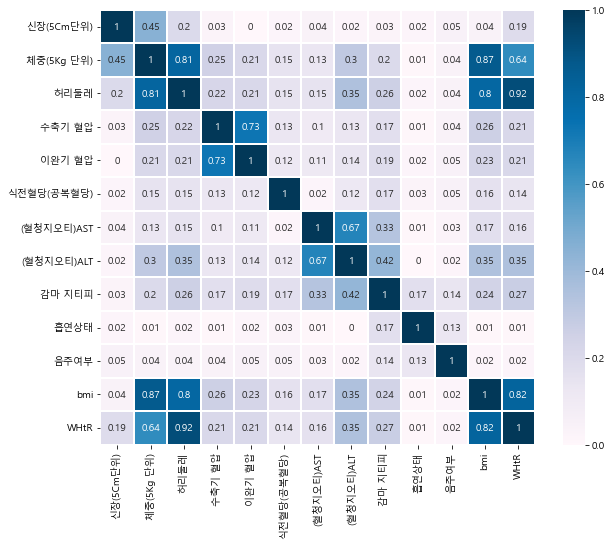

In [147]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
sns.heatmap(crr1, linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10})
plt.show()

## WHtR 과 상관관계 있는 컬럼

In [162]:
li_weak, li_strong, li_very_strong = [], [], []

In [163]:
i = 'WHtR'
for j in crr.columns:
    if i is not j:
        crr_one = crr1.loc[i, j]
        crr_org = crr.loc[i, j]
        if crr_one < 0.1:
            pass
        elif crr_one < 0.3:
            li_weak.append((crr_org, j))
        elif crr_one < 0.7:
            li_strong.append((crr_org, j))
        else:
            li_very_strong.append((crr_org, j))     

In [167]:
li_very_strong
sorted(li_very_strong)

[(0.82, 'bmi'), (0.92, '허리둘레')]

In [168]:
sorted(li_strong)

[(0.35, '(혈청지오티)ALT'), (0.64, '체중(5Kg 단위)')]

In [169]:
sorted(li_weak)

[(-0.19, '신장(5Cm단위)'),
 (0.14, '식전혈당(공복혈당)'),
 (0.16, '(혈청지오티)AST'),
 (0.21, '수축기 혈압'),
 (0.21, '이완기 혈압'),
 (0.27, '감마 지티피')]

- bmi (0.82), 
- ALT (0.35),
- 감마지티피(0.27), 혈압 (0.21/0.21), AST(0.16)